<a href="https://colab.research.google.com/github/Santosh-Gupta/Lit2Vec2/blob/master/Lit2Vec2Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install adjustText 

  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7099 sha256=8207ab83a8a738d43b575b0b80ab1657c5e8b38a1311249d4c6644f11337c017
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


In [0]:
import requests
import numpy as np
import pickle
from adjustText import adjust_text
from sklearn.manifold import TSNE
from matplotlib import pyplot

In [0]:

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [0]:
download_file_from_google_drive('1v-_t9Z7bX5sgIc-XEaCFBa-zpMhtLASU', 'Lit2vec2Embeds.npy')

In [0]:
download_file_from_google_drive('192WcoPC9TvvLQozcecX3BTEOlUcmejSu', 'EmbedIDtoGRID.pkl')

download_file_from_google_drive('1-6XfmD77JmCSBvYYfVXYpVILWHRLo-rr', 'GRIDtoTitle.pkl')

download_file_from_google_drive('1-6sAA9tWU1RJNxv4gr0QKgZwFIz4hrxj', 'GRIDtoAuthor.pkl')

In [0]:
download_file_from_google_drive('1YJPq6BRCpNFmWWXlszkFOE9vH7qv-LOx', 'GRIDtoEmbedID.pkl')


In [0]:
with open('EmbedIDtoGRID.pkl', 'rb') as handle:
    EmbedIDtoGRID = pickle.load(handle)

with open('GRIDtoTitle.pkl', 'rb') as handle:
    GRIDtoTitle = pickle.load(handle)

with open('GRIDtoAuthor.pkl', 'rb') as handle:
    GRIDtoAuthor = pickle.load(handle)

with open('GRIDtoEmbedID.pkl', 'rb') as handle:
    GRIDtoEmbedID = pickle.load(handle)


In [0]:
lit2vec2Embeds = np.load( 'Lit2vec2Embeds.npy' )

In [19]:
authorPhrase = 'Tolle'
lines = []
for i in GRIDtoAuthor:
  if type(GRIDtoAuthor[i]) is str:
    if authorPhrase in GRIDtoAuthor[i] :
        lines.append(i)
for j in lines:
  print( GRIDtoTitle[j], ' by ', GRIDtoAuthor[j], ' | Book ID: ', j  )

The Power of Now: A Guide to Spiritual Enlightenment  by  Eckhart Tolle  | Book ID:  6708
A New Earth: Awakening to Your Life's Purpose  by  Eckhart Tolle  | Book ID:  2590505
Practicing the Power of Now: Essential Teachings, Meditations, and Exercises from the Power of Now  by  Eckhart Tolle  | Book ID:  6709
A New Earth: Awakening to Your Life's Purpose  by  Eckhart Tolle  | Book ID:  76334
Stillness Speaks  by  Eckhart Tolle  | Book ID:  67864
A New Earth: Awakening to Your Life's Purpose  by  Eckhart Tolle  | Book ID:  4906096
Guardians of Being  by  Eckhart Tolle  | Book ID:  6389355
A New Earth: Awakening to Your Life's Purpose  by  Eckhart Tolle  | Book ID:  1705878
The Power of Now: A Guide to Spiritual Enlightenment  by  Eckhart Tolle  | Book ID:  6512869
تمرین نیروی حال  by  Eckhart Tolle  | Book ID:  2021921
نیروی حال: رهنمونی برای روشن‌بینی معنوی  by  Eckhart Tolle  | Book ID:  2021966
In the Presence of a Great Mystery  by  Eckhart Tolle  | Book ID:  184265
Practicing the 

In [22]:
titlePhrase = 'Steve Jobs'
lines = []
for i in GRIDtoTitle:
  if type(GRIDtoTitle[i]) is str:
    if titlePhrase in GRIDtoTitle[i] :
        lines.append(i)
for j in lines:
  print( GRIDtoTitle[j], ' by ', GRIDtoAuthor[j], ' | Book ID: ', j  )

Steve Jobs  by  Walter Isaacson  | Book ID:  11297044
Steve Jobs  by  Walter Isaacson  | Book ID:  11084145
iCon: Steve Jobs, the Greatest Second Act in the History of Business  by  Jeffrey S. Young  | Book ID:  49312
Becoming Steve Jobs: The Evolution of a Reckless Upstart into a Visionary Leader  by  Brent Schlender  | Book ID:  24386240
Creative Selection: Inside Apple's Design Process During the Golden Age of Steve Jobs  by  Ken Kocienda  | Book ID:  37638098
Creative Selection: Inside Apple's Design Process During the Golden Age of Steve Jobs  by  Ken Kocienda  | Book ID:  40501533
Becoming Steve Jobs: The Evolution of a Reckless Upstart into a Visionary Leader  by  Brent Schlender  | Book ID:  22318382
The Zen of Steve Jobs  by  Caleb Melby  | Book ID:  13078116
Steve Jobs  by  Walter Isaacson  | Book ID:  13503150
The Steve Jobs Way: iLeadership for a New Generation  by  Jay Elliot  | Book ID:  10589332
Steve Jobs: The Man Who Thought Different  by  Karen Blumenthal  | Book ID: 

In [0]:
numberResults = 100

In [41]:
#Steve Jobs Walter Isaacson  | Book ID:  128

bookEmbID = GRIDtoEmbedID[20520183]

bookEmb = np.take(lit2vec2Embeds, bookEmbID, axis=0) 
similaritybookEmb = np.matmul(bookEmb, np.transpose(lit2vec2Embeds))

nearestBookEmb = (-similaritybookEmb).argsort()[0:numberResults]

for k in range(0, 30):
  print(GRIDtoTitle[EmbedIDtoGRID[nearestBookEmb[k]]], GRIDtoAuthor[EmbedIDtoGRID[nearestBookEmb[k]]])

A Thousand Splendid Suns Khaled Hosseini
Water for Elephants Sara Gruen
The Secret Life of Bees Sue Monk Kidd
My Sister's Keeper Jodi Picoult
The Glass Castle Jeannette Walls
The Kite Runner Khaled Hosseini
Eat, Pray, Love Elizabeth Gilbert
The Memory Keeper's Daughter Kim Edwards
The Lovely Bones Alice Sebold
Something Borrowed (Darcy & Rachel, #1) Emily Giffin
The Help Kathryn Stockett
Nineteen Minutes Jodi Picoult
The Poisonwood Bible Barbara Kingsolver
Memoirs of a Geisha Arthur Golden
Something Blue (Darcy & Rachel, #2) Emily Giffin
The Pact Jodi Picoult
Twilight (Twilight, #1) Stephenie Meyer
The Notebook (The Notebook, #1) Nicholas Sparks
The Red Tent Anita Diamant
The Time Traveler's Wife Audrey Niffenegger
I Know This Much Is True Wally Lamb
The Guernsey Literary and Potato Peel Pie Society Mary Ann Shaffer
She's Come Undone Wally Lamb
The Other Boleyn Girl (The Plantagenet and Tudor Novels, #9) Philippa Gregory
Sarah's Key Tatiana de Rosnay
The Shack William Paul Young
The Gi

In [0]:
for_TSNE = np.take(lit2vec2Embeds, nearestBookEmb, axis=0) 

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
two_d_embeddings = tsne.fit_transform(for_TSNE)

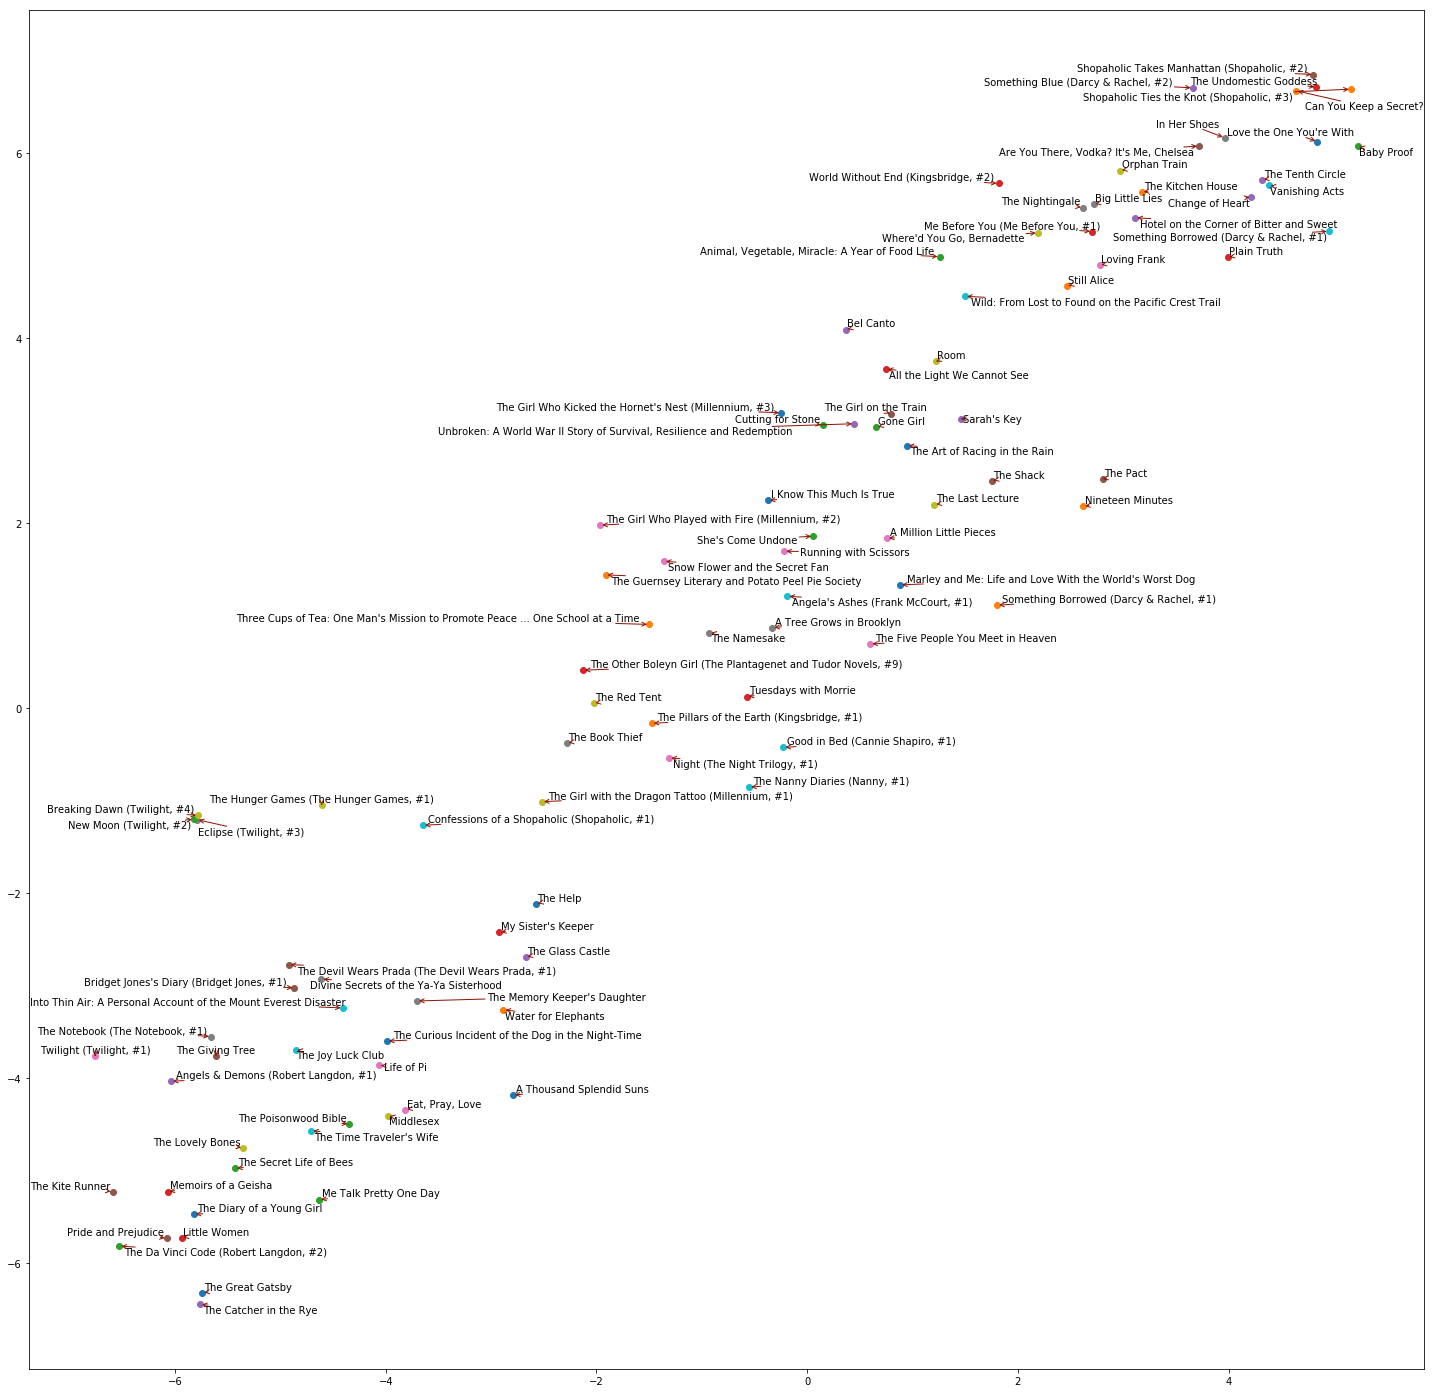

In [43]:
texts = []

def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  pyplot.figure(figsize=(numberResults/4, numberResults/4))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    pyplot.scatter(x, y)
    texts.append(pyplot.text(x, y, label))
  
  adjust_text(texts , arrowprops=dict(arrowstyle='->', color='#8f1402' ) ) 
  pyplot.show()

books = [GRIDtoTitle[EmbedIDtoGRID[i]] for i in nearestBookEmb]
plot(two_d_embeddings, books)